In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [84]:
df = pd.read_csv('force2020_data_unsupervised_learning.csv')
df.head(2)

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.13118
1,1.889794,79.262886,494.680,NaN,19.383013,160.60347


In [85]:
df = pd.read_csv('force2020_data_unsupervised_learning.csv', index_col = 'DEPTH_MD')
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,NaN,20.915468,161.131180
494.680,1.889794,79.262886,NaN,19.383013,160.603470
494.832,1.896523,74.821999,NaN,22.591518,160.173615
494.984,1.891913,72.878922,NaN,32.191910,160.149429
495.136,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,NaN,NaN
3271.568,2.643114,21.444370,0.185574,NaN,NaN
3271.720,2.681300,22.646879,0.176074,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18270 entries, 494.528 to 3272.024000000001
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RHOB    18270 non-null  float64
 1   GR      18270 non-null  float64
 2   NPHI    14032 non-null  float64
 3   PEF     16440 non-null  float64
 4   DTC     18189 non-null  float64
dtypes: float64(5)
memory usage: 856.4 KB


In [87]:
df['NPHI'] = pd.to_numeric(df['NPHI'], errors='coerce')
df['PEF'] = pd.to_numeric(df['PEF'], errors='coerce')
df['DTC'] = pd.to_numeric(df['DTC'], errors='coerce')

In [88]:
mean_NPHI = df['NPHI'].mean()
mean_PEF = df['PEF'].mean()
mean_DTC = df['DTC'].mean()

In [89]:
df["NPHI"] = df["NPHI"].fillna(mean_NPHI)
df["PEF"] = df["PEF"].fillna(mean_PEF)
df["DTC"] = df["DTC"].fillna(mean_DTC)

In [90]:
df

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
494.528,1.884186,80.200851,0.404547,20.915468,161.131180
494.680,1.889794,79.262886,0.404547,19.383013,160.603470
494.832,1.896523,74.821999,0.404547,22.591518,160.173615
494.984,1.891913,72.878922,0.404547,32.191910,160.149429
495.136,1.880034,71.729141,0.404547,38.495632,160.128342
...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,3.463851,125.106178
3271.568,2.643114,21.444370,0.185574,3.463851,125.106178
3271.720,2.681300,22.646879,0.176074,3.463851,125.106178


In [91]:
df.iloc[1050:1052]

,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,
654.128,2.104664,69.805153,0.404547,2.277884,141.792587
654.280,2.112174,71.925179,0.404547,2.274526,141.792343


In [92]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000
mean,2.110451,63.847477,0.404547,3.463851,125.106178
std,0.297725,28.636331,0.117023,2.429575,30.550384
min,1.404576,6.191506,0.024330,1.010027,55.726753
25%,1.963399,43.866690,0.344193,2.355565,90.948286
50%,2.055079,66.777851,0.404547,2.988451,141.197800
75%,2.381963,81.542681,0.491632,4.046910,148.012402
max,2.927888,499.022583,0.800262,66.030319,175.953140


In [93]:
df.isnull().sum()

RHOB    0
GR      0
NPHI    0
PEF     0
DTC     0
dtype: int64

# Data Transformation

In [94]:
df.describe()

,RHOB,GR,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,18270.000000,18270.000000
mean,2.110451,63.847477,0.404547,3.463851,125.106178
std,0.297725,28.636331,0.117023,2.429575,30.550384
min,1.404576,6.191506,0.024330,1.010027,55.726753
25%,1.963399,43.866690,0.344193,2.355565,90.948286
50%,2.055079,66.777851,0.404547,2.988451,141.197800
75%,2.381963,81.542681,0.491632,4.046910,148.012402
max,2.927888,499.022583,0.800262,66.030319,175.953140


In [95]:
scaler = StandardScaler()

In [96]:
df[['RHOB_T', 'GR_T', 'NPHI_T', 'PEF_T', 'DTC_T']] = scaler.fit_transform(df[['RHOB', 'GR', 'NPHI', 'PEF', 'DTC']])
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,
494.528,1.884186,80.200851,0.404547,20.915468,161.131180,-0.759999,0.571087,-4.743732e-16,7.183187,1.179232e+00
494.680,1.889794,79.262886,0.404547,19.383013,160.603470,-0.741163,0.538331,-4.743732e-16,6.552420,1.161958e+00
494.832,1.896523,74.821999,0.404547,22.591518,160.173615,-0.718560,0.383248,-4.743732e-16,7.873059,1.147887e+00
494.984,1.891913,72.878922,0.404547,32.191910,160.149429,-0.734045,0.315393,-4.743732e-16,11.824636,1.147096e+00
495.136,1.880034,71.729141,0.404547,38.495632,160.128342,-0.773944,0.275241,-4.743732e-16,14.419285,1.146405e+00
...,...,...,...,...,...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,3.463851,125.106178,1.745819,-1.551518,-1.852130e+00,0.000000,4.651740e-16
3271.568,2.643114,21.444370,0.185574,3.463851,125.106178,1.789158,-1.480786,-1.871240e+00,0.000000,4.651740e-16
3271.720,2.681300,22.646879,0.176074,3.463851,125.106178,1.917421,-1.438792,-1.952429e+00,0.000000,4.651740e-16


# Clustering the Data (2 Variable)

In [97]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    fig = plt.subplots(figsize=[10,5])
    plt.plot(means,inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()

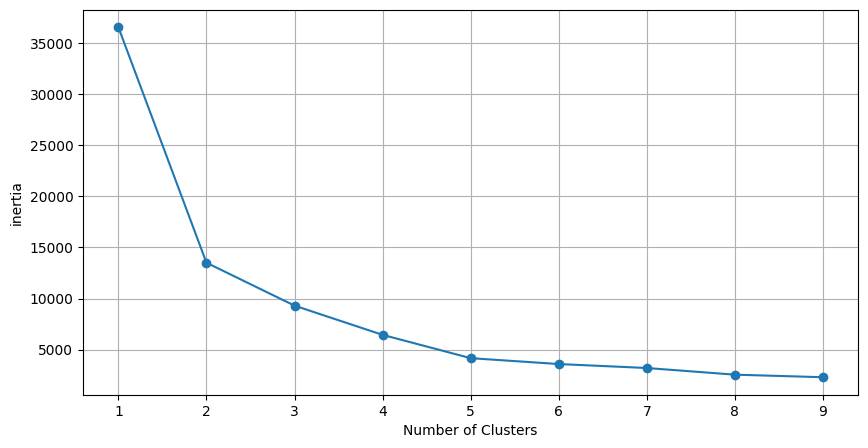

In [98]:
optimize_k_means(df[['RHOB_T', 'NPHI_T']], 10)

# Applying K Means Clustering

In [99]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['NPHI_T','RHOB_T']])

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [100]:
df['kmeans_3'] = kmeans.labels_
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3
DEPTH_MD,,,,,,,,,,,
494.528,1.884186,80.200851,0.404547,20.915468,161.131180,-0.759999,0.571087,-4.743732e-16,7.183187,1.179232e+00,0
494.680,1.889794,79.262886,0.404547,19.383013,160.603470,-0.741163,0.538331,-4.743732e-16,6.552420,1.161958e+00,0
494.832,1.896523,74.821999,0.404547,22.591518,160.173615,-0.718560,0.383248,-4.743732e-16,7.873059,1.147887e+00,0
494.984,1.891913,72.878922,0.404547,32.191910,160.149429,-0.734045,0.315393,-4.743732e-16,11.824636,1.147096e+00,0
495.136,1.880034,71.729141,0.404547,38.495632,160.128342,-0.773944,0.275241,-4.743732e-16,14.419285,1.146405e+00,0
...,...,...,...,...,...,...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,3.463851,125.106178,1.745819,-1.551518,-1.852130e+00,0.000000,4.651740e-16,1
3271.568,2.643114,21.444370,0.185574,3.463851,125.106178,1.789158,-1.480786,-1.871240e+00,0.000000,4.651740e-16,1
3271.720,2.681300,22.646879,0.176074,3.463851,125.106178,1.917421,-1.438792,-1.952429e+00,0.000000,4.651740e-16,1


# Plotting the Result

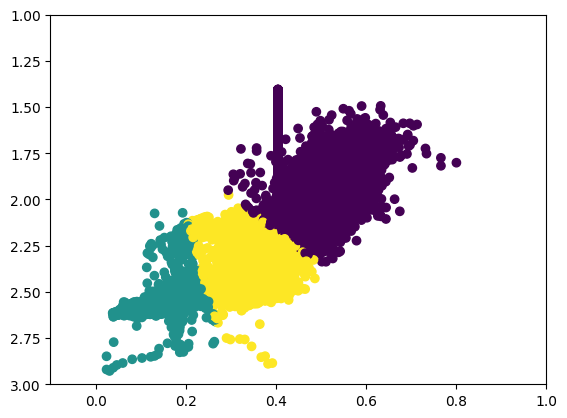

In [110]:
plt.scatter(x=df['NPHI'], y=df['RHOB'], c=df['kmeans_3'])
plt.xlim(-0.1, 1)
plt.ylim(3, 1)
plt.show()

In [111]:
for k in range(1, 6):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df[['RHOB_T', 'NPHI_T']])
    df[f'KMeans_{k}'] = kmeans.labels_

In [112]:
df

,RHOB,GR,NPHI,PEF,DTC,RHOB_T,GR_T,NPHI_T,PEF_T,DTC_T,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
DEPTH_MD,,,,,,,,,,,,,,,,
494.528,1.884186,80.200851,0.404547,20.915468,161.131180,-0.759999,0.571087,-4.743732e-16,7.183187,1.179232e+00,0,0,1,2,2,1
494.680,1.889794,79.262886,0.404547,19.383013,160.603470,-0.741163,0.538331,-4.743732e-16,6.552420,1.161958e+00,0,0,1,2,2,1
494.832,1.896523,74.821999,0.404547,22.591518,160.173615,-0.718560,0.383248,-4.743732e-16,7.873059,1.147887e+00,0,0,1,2,2,1
494.984,1.891913,72.878922,0.404547,32.191910,160.149429,-0.734045,0.315393,-4.743732e-16,11.824636,1.147096e+00,0,0,1,2,2,1
495.136,1.880034,71.729141,0.404547,38.495632,160.128342,-0.773944,0.275241,-4.743732e-16,14.419285,1.146405e+00,0,0,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271.416,2.630211,19.418915,0.187811,3.463851,125.106178,1.745819,-1.551518,-1.852130e+00,0.000000,4.651740e-16,1,0,0,1,0,2
3271.568,2.643114,21.444370,0.185574,3.463851,125.106178,1.789158,-1.480786,-1.871240e+00,0.000000,4.651740e-16,1,0,0,1,0,2
3271.720,2.681300,22.646879,0.176074,3.463851,125.106178,1.917421,-1.438792,-1.952429e+00,0.000000,4.651740e-16,1,0,0,1,0,2


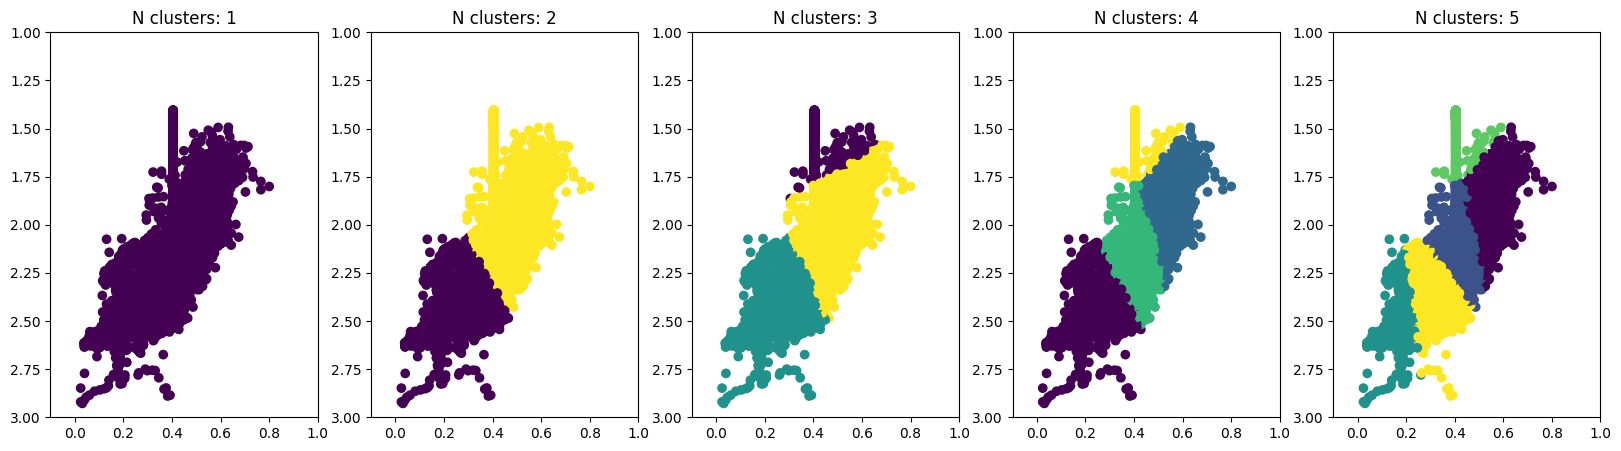

In [116]:
fig, axs = plt.subplots(nrows = 1, ncols = 5, figsize = [20,5])

for i, ax in enumerate(fig.axes, start = 1):
    ax.scatter(x=df['NPHI'], y=df['RHOB'], c=df[f'KMeans_{i}'])
    ax.set_ylim(3, 1)
    ax.set_xlim(-0.1, 1)
    ax.set_title(f'N clusters: {i}')